### Batch Gradient Descent

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('yahoo_data.xlsx', engine = 'openpyxl')
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [3]:
df.rename(columns={
    'Date':'date',
    'Open':'open',
    'High':'high',
    'Low':'low',
    'Close*':'close',
    'Adj Close**':'adj_close',
    'Volume':'volume'
}, inplace=True)
df.head()

,date,open,high,low,close,adj_close,volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [4]:
df.pop('date')

0       Apr 28, 2023
1       Apr 27, 2023
2       Apr 26, 2023
3       Apr 25, 2023
4       Apr 24, 2023
            ...     
1253    May 07, 2018
1254    May 04, 2018
1255    May 03, 2018
1256    May 02, 2018
1257    May 01, 2018
Name: date, Length: 1258, dtype: object

In [5]:
# features and target
x = df[['open', 'high', 'low', 'volume']]
y = df['close'] 

In [6]:
# standardizing the data
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

In [7]:
# data split
split_index = int(len(x) * 0.8)

x_train = x.iloc[:split_index]
x_test  = x.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]

In [8]:
# custom class
class batch_gd:
    def __init__(self, learning_rate, epochs):
        self.intercept_ = None
        self.coef_ = None
        self.n = learning_rate
        self.epochs = epochs
        self.loss_history = []
    
    def fit(self, x_train, y_train):
        # random init
        self.coef_ = np.ones(x_train.shape[1])
        self.intercept_ = 0

        for i in range(self.epochs):
            # updating the intercept
            y_pred = self.intercept_ + np.dot(x_train, self.coef_)
            d_intercept_ = (-2/x_train.shape[0]) * np.sum(y_train - y_pred)
            self.intercept_ -= (self.n * d_intercept_)

            # updating the coef
            d_coef_ = (-2/x_train.shape[0]) * np.dot((y_train - y_pred), x_train)
            self.coef_ -= (self.n * d_coef_)

            loss = np.mean((y_train - y_pred)**2)

            self.loss_history.append(loss)
            print(f"step {i} | loss = {loss}")
        print('Final parameters...✅')
        print('intercept = ',self.intercept_)
        print('coef = ',self.coef_)

    def predict(self, x_test):
        return self.intercept_ + np.dot(x_test, self.coef_)

In [9]:
# model train
gd = batch_gd(0.1, 100)
gd.fit(x_train, y_train)

step 0 | loss = 4.166794449584399
step 1 | loss = 1.3361471008466754
step 2 | loss = 0.6423134112510901
step 3 | loss = 0.3819054938991757
step 4 | loss = 0.24469321193655977
step 5 | loss = 0.16088229572542892
step 6 | loss = 0.10713732022053096
step 7 | loss = 0.07208121799052966
step 8 | loss = 0.04902274767454011
step 9 | loss = 0.03376346499627647
step 10 | loss = 0.023611122480531578
step 11 | loss = 0.016822500779508393
step 12 | loss = 0.012261455974505786
step 13 | loss = 0.009183251525048047
step 14 | loss = 0.00709704005835145
step 15 | loss = 0.005677587988969097
step 16 | loss = 0.004708287161993333
step 17 | loss = 0.004044162090941144
step 18 | loss = 0.0035877252403767523
step 19 | loss = 0.003273132007349844
step 20 | loss = 0.0030557262952933457
step 21 | loss = 0.002905106362568825
step 22 | loss = 0.002800502085767043
step 23 | loss = 0.0027276780718015273
step 24 | loss = 0.0026768493386080897
step 25 | loss = 0.002641272366019998
step 26 | loss = 0.002616288804291

In [10]:
y_pred = gd.predict(x_test)

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9763840321306275

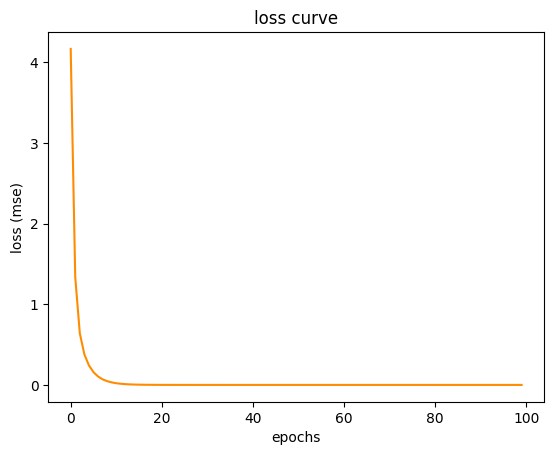

In [13]:
# loss curve
import matplotlib.pyplot as plt

plt.plot(range(gd.epochs), gd.loss_history, color = 'darkorange')
plt.title('loss curve')
plt.xlabel('epochs')
plt.ylabel('loss (mse)')
plt.show()